<a href="https://colab.research.google.com/github/MayerT1/Deep_forest_trials/blob/main/Deep_Forest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://deepforest.readthedocs.io/en/v1.3.3/getting_started.html

In [ ]:
!pip install DeepForest

In [ ]:
!git clone https://github.com/weecology/DeepForest.git

fatal: destination path 'DeepForest' already exists and is not an empty directory.


In [ ]:
data_path = "/content/DeepForest/src/deepforest"
data_path

'/content/DeepForest/src/deepforest'

In [ ]:
%cd /content/DeepForest/src/deepforest

/content/DeepForest/src/deepforest


In [ ]:
!pwd

/content/DeepForest/src/deepforest


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


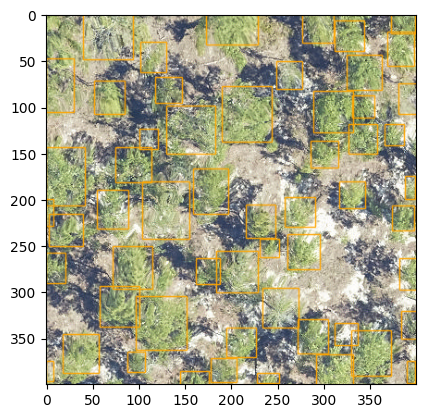

In [ ]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt

model = main.deepforest()
model.use_release()

sample_image_path = get_data("OSBS_029.png")
img = model.predict_image(path=sample_image_path, return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order. Many functions in deepforest will automatically perform this flip for you and give a warning.
plt.imshow(img[:,:,::-1])

In [ ]:
!pwd


/content/DeepForest/src/deepforest


In [ ]:
sample_image = get_data("OSBS_029.png")
sample_image
# '/Users/benweinstein/Documents/DeepForest/deepforest/data/OSBS_029.png'

'/usr/local/lib/python3.10/dist-packages/deepforest/data/OSBS_029.png'

In [ ]:
image_path = get_data("OSBS_029.png")
boxes = model.predict_image(path=image_path, return_plot = False)

In [ ]:
boxes.head()

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,330.0,342.0,373.0,391.0,Tree,0.802979,OSBS_029.png,"POLYGON ((373 342, 373 391, 330 391, 330 342, ..."
1,216.0,206.0,248.0,242.0,Tree,0.778803,OSBS_029.png,"POLYGON ((248 206, 248 242, 216 242, 216 206, ..."
2,325.0,44.0,363.0,82.0,Tree,0.751573,OSBS_029.png,"POLYGON ((363 44, 363 82, 325 82, 325 44, 363 ..."
3,261.0,238.0,296.0,276.0,Tree,0.748605,OSBS_029.png,"POLYGON ((296 238, 296 276, 261 276, 261 238, ..."
4,173.0,0.0,229.0,33.0,Tree,0.738210,OSBS_029.png,"POLYGON ((229 0, 229 33, 173 33, 173 0, 229 0))"


Predicting: |          | 0/? [00:00<?, ?it/s]

197 predictions in overlapping windows, applying non-max supression
94 predictions kept after non-max suppression


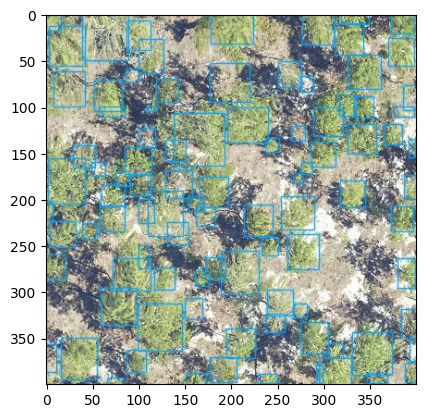

In [ ]:
raster_path = get_data("OSBS_029.tif")
# Window size of 300px with an overlap of 25% among windows for this small tile.
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=300,patch_overlap=0.25)

# View boxes overlayed when return_plot=True, when False, boxes are returned.
plt.imshow(predicted_raster)
plt.show()

In [ ]:
image_path, xmin, ymin, xmax, ymax, label

NameError: name 'xmin' is not defined

In [ ]:
import os

csv_file = get_data("testfile_deepforest.csv")
boxes = model.predict_file(csv_file=csv_file, root_dir = os.path.dirname(csv_file),savedir=".")

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
!pip install rasterio

In [ ]:
import rasterio

In [ ]:
import deepforest

In [ ]:
img = get_data("OSBS_029.tif")
r = rasterio.open(img)
transform = r.transform
crs = r.crs
print(crs)

EPSG:32617


In [ ]:
crs.from_epsg(32617)

CRS.from_epsg(32617)

In [ ]:
m = main.deepforest()
m.use_release(check_release=False)
df = m.predict_image(path=img)

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
m

deepforest(
  (model): RetinaNet(
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): FrozenBatchNorm2d(256, eps=0.0)
            (relu): ReLU(inplace=True)
            (downsample): Sequential(
              (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias

In [ ]:
df

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,330.0,342.0,373.0,391.0,Tree,0.802979,OSBS_029.tif,"POLYGON ((373 342, 373 391, 330 391, 330 342, ..."
1,216.0,206.0,248.0,242.0,Tree,0.778803,OSBS_029.tif,"POLYGON ((248 206, 248 242, 216 242, 216 206, ..."
2,325.0,44.0,363.0,82.0,Tree,0.751573,OSBS_029.tif,"POLYGON ((363 44, 363 82, 325 82, 325 44, 363 ..."
3,261.0,238.0,296.0,276.0,Tree,0.748605,OSBS_029.tif,"POLYGON ((296 238, 296 276, 261 276, 261 238, ..."
4,173.0,0.0,229.0,33.0,Tree,0.738210,OSBS_029.tif,"POLYGON ((229 0, 229 33, 173 33, 173 0, 229 0))"
5,258.0,198.0,291.0,230.0,Tree,0.716250,OSBS_029.tif,"POLYGON ((291 198, 291 230, 258 230, 258 198, ..."
6,97.0,305.0,152.0,363.0,Tree,0.711664,OSBS_029.tif,"POLYGON ((152 305, 152 363, 97 363, 97 305, 15..."
7,52.0,72.0,85.0,108.0,Tree,0.698782,OSBS_029.tif,"POLYGON ((85 72, 85 108, 52 108, 52 72, 85 72))"
8,292.0,368.0,332.0,400.0,Tree,0.688486,OSBS_029.tif,"POLYGON ((332 368, 332 400, 292 400, 292 368, ..."
9,249.0,51.0,277.0,81.0,Tree,0.688165,OSBS_029.tif,"POLYGON ((277 51, 277 81, 249 81, 249 51, 277 ..."


In [ ]:
from deepforest import utilities

In [ ]:
gdf = utilities.annotations_to_shapefile(df, transform=transform, crs=crs)

NotImplementedError: This function is deprecated. Please use image_to_geo_coordinates instead.

In [ ]:
#def image_to_geo_coordinates(gdf, root_dir, flip_y_axis=False):

gdf = utilities.image_to_geo_coordinates(df, "/content/DeepForest/src/deepforest/data", flip_y_axis=False)
gdf

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,330.0,342.0,373.0,391.0,Tree,0.802979,OSBS_029.tif,"POLYGON ((404249.25 3285108.65, 404249.25 3285..."
1,216.0,206.0,248.0,242.0,Tree,0.778803,OSBS_029.tif,"POLYGON ((404236.75 3285122.25, 404236.75 3285..."
2,325.0,44.0,363.0,82.0,Tree,0.751573,OSBS_029.tif,"POLYGON ((404248.25 3285138.45, 404248.25 3285..."
3,261.0,238.0,296.0,276.0,Tree,0.748605,OSBS_029.tif,"POLYGON ((404241.55 3285119.05, 404241.55 3285..."
4,173.0,0.0,229.0,33.0,Tree,0.738210,OSBS_029.tif,"POLYGON ((404234.85 3285142.85, 404234.85 3285..."
5,258.0,198.0,291.0,230.0,Tree,0.716250,OSBS_029.tif,"POLYGON ((404241.05 3285123.05, 404241.05 3285..."
6,97.0,305.0,152.0,363.0,Tree,0.711664,OSBS_029.tif,"POLYGON ((404227.15 3285112.35, 404227.15 3285..."
7,52.0,72.0,85.0,108.0,Tree,0.698782,OSBS_029.tif,"POLYGON ((404220.45 3285135.65, 404220.45 3285..."
8,292.0,368.0,332.0,400.0,Tree,0.688486,OSBS_029.tif,"POLYGON ((404245.15 3285106.05, 404245.15 3285..."
9,249.0,51.0,277.0,81.0,Tree,0.688165,OSBS_029.tif,"POLYGON ((404239.65 3285137.75, 404239.65 3285..."


from matplotlib import pyplot as plt
gdf['xmin'].plot(kind='hist', bins=20, title='xmin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf['ymin'].plot(kind='hist', bins=20, title='ymin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf['xmax'].plot(kind='hist', bins=20, title='xmax')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf['ymax'].plot(kind='hist', bins=20, title='ymax')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf.plot(kind='scatter', x='xmin', y='ymin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf.plot(kind='scatter', x='ymin', y='xmax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf.plot(kind='scatter', x='xmax', y='ymax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf.plot(kind='scatter', x='ymax', y='score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gdf['xmin'].plot(kind='line', figsize=(8, 4), title='xmin')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
gdf['ymin'].plot(kind='line', figsize=(8, 4), title='ymin')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
gdf['xmax'].plot(kind='line', figsize=(8, 4), title='xmax')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
gdf['ymax'].plot(kind='line', figsize=(8, 4), title='ymax')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
gdf.total_bounds

array([ 404211.95, 3285102.85,  404251.95, 3285142.85])

In [ ]:
gdf.crs

<Projected CRS: EPSG:32617>
Name: WGS 84 / UTM zone 17N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
image_path = get_data("OSBS_029.png")
boxes = model.predict_image(path=image_path, return_plot = True, color=(0, 165, 255), thickness=3)

In [ ]:
gdf.to_file("output_file.geojson", driver="GeoJSON")

In [ ]:
gdf.to_file("output_shapefile.shp")

In [ ]:
gdf.to_csv("output_file.csv", index=False)

In [ ]:
!pwd

/content/DeepForest/src/deepforest


xx

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads

# Step 1: Read the CSV file
csv_file = "output_file.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Step 2: Convert POLYGON field to geometries
# Ensure the POLYGON field contains valid WKT strings
df['geometry'] = df['POLYGON'].apply(loads)  # Convert WKT to Shapely geometry

# Step 3: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Step 4: Set a Coordinate Reference System (CRS)
# Replace 'EPSG:4326' with the appropriate CRS for your data
gdf.set_crs("EPSG:4326", inplace=True)


KeyError: 'POLYGON'

In [ ]:
gdf.to_file("output_shapefile_2.shp")